## Introduction

__What is a bulge?__ Dense, bulbous central region of a galaxy.

The theoretical bulge model was implemented from [Noordermeer (2008)](https://doi.org/10.1111/j.1365-2966.2008.12837.x). 

***
## Equations

>__Luminosity__: <br>
    \begin{equation}
    I_b(\kappa) = I_0 \exp \left[-\left(\frac{\kappa}{r_0} \right)^{\frac{1}{n}}\right]
    \end{equation}
    <br>
>where:<br>
        $I_0$ = central surface brightness<br>
        $n$ = concentration parameter<br> 
        $r_0$ = characteristic radius (related to $r_e$)<br>
        $r_e$ = effective radius<br>
<br>
>__Gamma function__: <br>
from Noordermeer's paper<br>
    \begin{equation}
    \gamma(b_n,2n) = \frac{1}{2} \Gamma(2n)
    \end{equation}<br>
    \begin{equation}
    r_e = b_n^n r_0 b_n 
    \end{equation}<br>
from Anthony's calculations<br>
    \begin{equation}
    \gamma(n,u_e) = \frac{1}{2} \Gamma(n)
    \end{equation}<br>

>__Velocity__: <br>
    <font color="green">
    \begin{equation}
V_{B}^{2}(r) = C \int_{m=0}^{r} \left[\int_{\kappa=m}^{\infty} \frac {e^{-\left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}}} \left(\frac{\kappa}{r_0}\right)^{\frac{1}{n-1}}} {\sqrt{\kappa^2-m^2}} d\kappa\right] \times \frac{m^{2}}{\sqrt{r^{2}-m^{2}e^{2}}} dm
    \end{equation}<br></font>
>where:<br>
    \begin{equation}
    C = \frac{4Gq\Upsilon_b I_0}{r_0n} \sqrt{sin^{2}i + \frac{1}{q^{2}} cos^{2}i}
    \end{equation}<br>
    \begin{equation}
    e = \sqrt{1-q^{2}}
    \end{equation}<br> 
        $\Upsilon_b$ = mass-to-light ratio<br>
        $e$ = eccentricity of the bulge<br>
        $q$ = intrinsic axis ratio<br> 
        $i$ = inclination angle<br> 
        $G$ = gravitational constant<br>
    <br>
***

In [1]:
# Importing python libraries for our calculations
import numpy as np                       # numpy library for basic calculations
from matplotlib import pyplot as plt     # matplotlib library for plotting
import scipy.integrate as si             # for integration
import scipy.optimize as so             
import scipy.special as ss

## Parameters

### Definition

(explanation for each parameter, copied from our notes, need better/shorter explanations for each) <br><br>

<b>Gravitational constant ($G$)</b>: empirical constant of the universal law of gravitation, converted to $kpc \times(km/s)^{2}$ $/$ $M_{\odot}$ to match all other units. <br><br>

<b>Concentration parameter ($n$)</b>: as Noordermeer describes: _"$n$ is a concentration parameter that describes the curvature of the profile in a radiusmagnitude plot"_(pg.1361). In his original paper, he experiences with different values of $n$ but as mentioned earlier, he uses parameters from his other papers to plot the bulge. On pg.1500, Noordermeer's _The stellar mass distribution in early-type disc galaxies: surface photometry and bulge–disc decompositions_ paper lists $n$ = 2.7 for the  bulge concentration parameter of UGC 9133 galaxy (NGC 5533). <br><br>

<b>Intrinsic axis ratio ($q$)</b>: _"q [is] the intrinsic axis ratio of the bulge isodensity surfaces"_ (Noordermeer, original paper, pg.1360). This parameter describes how flat a galaxy appears. The eccentricity can be calculated from this parameter: $e$ = $\sqrt{1 - q^{2}}$. The _"The stellar mass distribution in early-type disc galaxies"_ paper and also the original paper mentions $q$ = 0.3 but the table of values in the same shows $q$ = 0.33 (could this be a type-o? and it is supposed to be just $q$ = 0.3?.. not a big deal but we want to be accurate.)
- q=0.3 is reported only to one significant figure, which would make it consistent with q=0.33 (reported to two significant figures, but equivalent at one). I don't know why the value of q is reported to different levels of precision between the text and the table, but the values are not inconsistent.
<br><br>

<b>Characteristic radius ($r_0$) and Effective radius ($r_e$)</b>: As described earlier, _"$r_0$ is the characteristic radius, which is related to the effective radius ($r_e$, the radius which encompasses 50 percent of the light) as $r_e$ = $b_{n}^{n}$ $r_0$ $b_n$ is a scaling constant that is defined such that it satisfies $\gamma$($b_n$, 2n) = $^1/_2$$\Gamma$(2n), with $\gamma$ and $\Gamma$ the incomplete and complete gamma functions, respectively."_<br>
$r_e$ is 9.9 arcsec in Noordermeer's _"The stellar mass distribution in early-type disc galaxies"_ paper, and was converted to kpc using $D$ = 54.3 Mpc for the distance to the galaxy. The calculated value is: 2.6 kpc (see calculation below). <br><br>
<b>Inclination angle ($i$)</b>: The inclination angle for NGC 5533 galaxy is $i$ = 52$^\circ$ in _The stellar mass distribution in early-type disc galaxies_ paper and $i$ = 53$^\circ$ in _The mass distribution in early-type disc galaxies_ paper.

<b>Mass-to-light ratio ($\Upsilon_b$)</b>: This value is from the original paper: $\Upsilon_b$ = 2.8 $M_\odot / L_\odot$

<b>Luminosity ($L_\odot$)</b>: I'm trying to figure out where we got the 3.27e10 value from. We might have just guessed this value. Noordermeer mentions on page 5 of his 2008 paper: "The effects of the seeing on the measured bulge parameters were corrected for, using the deconvolutions from Graham (2001)."
***Found some things in our old Disk velocity calculations.***
- L = 10^(0.4*(Mag_sun - Mag_absolute))
    - This was commented out.
- Mag_absolute = -22.02, Mag_Sun = 4.42
- Mag_absolute does not match M_B (-21.22) or M_R (-22.62) from Noordermeer's papers.
    - Manually using one of these values does not result in a match, either.

<b>Central surface brightness ($I_0$)</b>: The central surface brightness was explained by Noordermeer as: <br>
_"$I_0$ and $r_0$ scaled such that all bulges have equal total luminosity ($L_b$ = 5 × $10^9$ $L_\odot$) and
effective radius ($r_e$ = 1 kpc)."_ <br>
This resulted from the gamma function the following way in our code: $I_0 = L*root^{2n}/(r_e^2*2\pi n*gamma(2n))$. <br>


($L$ is luminosity, $gamma$ is the gamma function, $root$ is the root of the gamma function, $n$ is concentration parameter, $r_e$ is the effective radius.) <br> We found an equation in this paper that was referenced by Noordermeer: [_Graham: An investigation into the prominence of spiral galaxy bulges_](https://iopscience.iop.org/article/10.1086/318767/pdf) (pg.822/eq.3): <br>


$L_{tot} = \frac{n2\pi r^2_eI_ee^b}{(b_n)^{2n}}\Gamma(2n)$, where $I_0 = I_ee^b$.The calculation resulted in a central surface brightness of about 4.10e10 (units?).

### Assigning values

In [2]:
# Constants
G = 4.300e-6                                # gravitational constant (kpc/solar mass*(km/s)^2)

# Parameters of the galaxy NGC 5533
n = 2.7                                     # concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
re = 2.6                                    # effective radius
L = 3.27e10                                 # luminosity
ups = 2.8                                   # mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                    # intrinsic axis ratio
i = 45*(np.pi/180)                          # inclination angle

## Gamma function

In [3]:
gammafunction = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(gammafunction,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations

## Define values

In [4]:
I0 = L*root**(2*n)/(re**2*2*np.pi*n*ss.gamma(2*n))
r0 = re/root**n

## Integrand 1

In [5]:
integrand1 = lambda x,m: np.exp(-np.power(x/r0, (1/n)))*np.power(x/r0, 1/n-1)/(np.sqrt(x**2-m**2))

## Integration

In [6]:
f = lambda m: si.quad(integrand1, m, np.inf,args=(m,))[0]
fv = np.vectorize(f)

## Define more values

In [7]:
C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)
radius = np.linspace(0.01, 60, 200)  # plot range

## Integrand 2

In [8]:
g = lambda m,r: C*f(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

## Integrate to get velocity squared

In [9]:
velsq = lambda r: si.quad(g, 0, r, args=(r,))[0]
velsqv = np.vectorize(velsq)

## Calculate velocity

In [10]:
vbulge = np.sqrt(velsqv(radius))

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, d

## Plot the velocity curve for the bulge

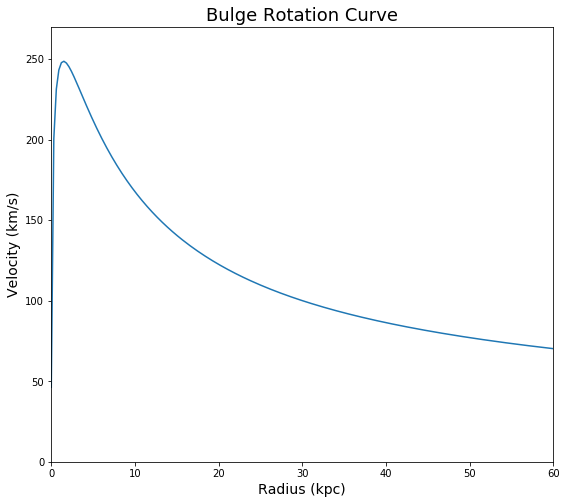

In [12]:
plt.figure(figsize=(9.0,8.0))                                     # size of the plot
plt.plot(radius, vbulge, linestyle='solid', label='Velocity(r)')  # x and y values of the plot          
plt.title('Bulge Rotation Curve', fontsize=18)                    # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=14)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=14)                        # labeling the y-axis
plt.axis([0,60,0,270])                                           # setting the axis limits
plt.savefig('bulge_theoretical.png')                              # saving the figure in a .png file

## Questions

##### Does the bulge have any effect on the rotation of the stars at 35 kpc?

##### What effect does changing the concentration parameter, $n$ to a lower number will have on the rotation curve?

##### Some questions about the curve

## References